<a href="https://colab.research.google.com/github/RupalJ-02/B43_DA_072_Geospatial-Data-Experts/blob/main/HR_Attrition_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import files
uploaded=files.upload()

Saving hrdataset.csv to hrdataset.csv


In [4]:
df=pd.read_csv('hrdataset.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
rows,columns = df.shape
shp = pd.DataFrame({"": ["Rows", "Columns"], "Count": [rows, columns]})
shp.set_index("", inplace=True)
shp

,Count
,
Rows,1470
Columns,35


In [8]:
#missing values in each column
empty = pd.DataFrame(df.isna().sum())
empty.rename(columns={0:"Count of Empty Values"})

,Count of Empty Values
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [9]:
#encoding categorical columns
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding with drop_first=True
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the transformed dataset
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


In [10]:
#apply scaling
# Identify numerical columns (excluding the target variable 'Attrition' since it's already encoded)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the transformed dataset
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,False,False,False,False,False,True,False,False,True,True
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,False,False,False,False,True,False,False,True,False,False
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,True,False,False,False,False,False,False,False,True,True
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,False,False,False,False,True,False,False,True,False,True
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,True,False,False,False,False,False,False,True,False,False


In [11]:
#splitting dat into training and testing set
# Define features (X) and target (y)
X = df_encoded.drop(columns=['Attrition_Yes'])  # All columns except the target
y = df_encoded['Attrition_Yes']  # Target variable (binary classification)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
#training the model
# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Train (fit) the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [13]:
#making predictions
# Predict on test data
y_pred = log_reg.predict(X_test)

# Predict probabilities for ROC Curve
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Get probability for class 1

In [14]:
#evaluating model performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)

In [15]:
import pandas as pd

# Create a DataFrame to display results
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC Score"],
    "Value": [accuracy, precision, recall, f1, roc_auc]
})

# Set precision to 4 decimal places
metrics_df["Value"] = metrics_df["Value"].round(4)

# Display the DataFrame
metrics_df

,Metric,Value
0,Accuracy,0.8639
1,Precision,0.6400
2,Recall,0.3404
3,F1 Score,0.4444
4,ROC-AUC Score,0.8095


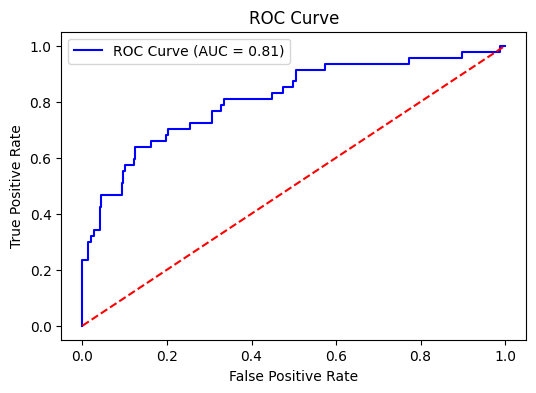

In [16]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

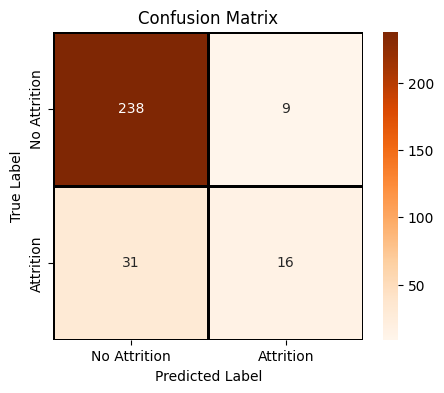

In [17]:
# Plot confusion matrix with a different color palette
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'], linewidths=1, linecolor='black')

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
def predict_attrition(input_data):

    # Convert input data to DataFrame if necessary
    if not isinstance(input_data, pd.DataFrame):
        input_data = pd.DataFrame([input_data])

    #
    # Get the feature columns used during training (excluding the target)
    feature_cols = X_train.columns

    missing_cols = set(feature_cols) - set(input_data.columns)
    for col in missing_cols:
        input_data[col] = 0  # Fill missing columns with 0

    # Only select the feature columns for prediction
    input_data = input_data[feature_cols]

    # Make prediction using the trained model
    prediction = log_reg.predict(input_data)[0]

    return prediction

In [22]:
# Sample input
sample_input = {
    'Age': 0.446350,
    'DailyRate': 0.742527,
    'DistanceFromHome': -1.010909,
    'Education': -0.891688,
    'EmployeeCount': 0.0,
    'EmployeeNumber': -1.701283,
    'EnvironmentSatisfaction': -0.660531,
    'HourlyRate': 1.383138,
    'JobInvolvement': 0.379672,
    'JobLevel': -0.057788,
    'JobRole_Laboratory Technician': False,
    'JobRole_Manager': False,
    'JobRole_Manufacturing Director': False,
    'JobRole_Research Director': False,
    'JobRole_Research Scientist': False,
    'JobRole_Sales Executive': True,
    'JobRole_Sales Representative': False,
    'MaritalStatus_Married': False,
    'MaritalStatus_Single': True,
    'OverTime_Yes': True
}
# Remove 'Attrition_Yes' if present
sample_input.pop('Attrition_Yes', None)
# Make prediction
prediction = predict_attrition(sample_input)

# Print prediction
if prediction == 0:
    print("The model predicts no attrition.")
else:
    print("The model predicts attrition.")

The model predicts no attrition.
